# Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data/flights_processed.csv')

## Separate into a new dataframe, relevant variables for clustering analysis

In [2]:
from scipy import stats
correlation_coefficient, p_value = stats.pointbiserialr(df['DepDel15'].replace(np.NaN, 0), df['FlightsSameTime80'])

print(correlation_coefficient)
print(p_value)

0.009593294047586461
6.962546090193629e-45


In [4]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['DepDel15'], df['FlightsSameTime80'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 197.14572007361102
P-value: 8.764387175511548e-45


In [6]:
import statsmodels.api as sm
contingency_table = pd.crosstab(df['FlightsSameTime80'], df['DepDel15'])

# Perform z-test for proportions
_, p_value = sm.stats.proportions_ztest(contingency_table.values[1], contingency_table.sum(axis=0))

In [11]:
bin_width = 250

max_distance = df['Distance'].max()
num_bins = int(np.ceil(max_distance / bin_width))

bins = np.arange(0, (num_bins + 1) * bin_width, bin_width)

df['DistanceBins'] = pd.cut(df['Distance'], bins=bins, labels=bins[:-1])

bin_proportions = df.groupby('DistanceBins')['DepDel15'].mean().reset_index()

bin_proportions.columns = ['DistanceBins', 'ProportionDelayed']

print(bin_proportions)

   DistanceBins  ProportionDelayed
0             0           0.179632
1           250           0.185714
2           500           0.204567
3           750           0.230126
4          1000           0.248719
5          1250           0.226455
6          1500           0.241812
7          1750           0.243719
8          2000           0.250015
9          2250           0.225178
10         2500           0.239912
11         2750           0.189349
12         3000           0.500000
13         3250           0.257868
14         3500           0.132075
15         3750           0.220790
16         4000           0.183721
17         4250           0.366412
18         4500           0.384937
19         4750           0.309302
20         5000           0.433566


In [56]:
df_cluster = df[['DayOfMonth', 
'DayOfWeek',
'Reporting_Airline',
'Origin',
'Dest',
'DistanceBins',
'DepHour',
'FlightsSameTime80',
'DepDel15']]

C:\Users\marti\AppData\Local\Temp\ipykernel_22604\592892694.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[col] = encoder.fit_transform(df_cluster[col])
C:\Users\marti\AppData\Local\Temp\ipykernel_22604\592892694.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[col] = encoder.fit_transform(df_cluster[col])
C:\Users\marti\AppData\Local\Temp\ipykernel_22604\592892694.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

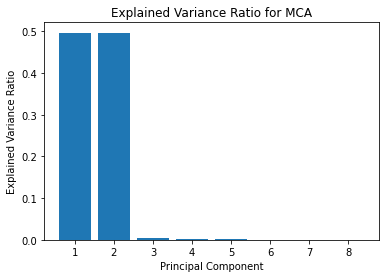

C:\Users\marti\AppData\Local\Temp\ipykernel_22604\592892694.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[f'MCA_Comp_{i+1}'] = mca_coordinates[:, i]
C:\Users\marti\AppData\Local\Temp\ipykernel_22604\592892694.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[f'MCA_Comp_{i+1}'] = mca_coordinates[:, i]
C:\Users\marti\AppData\Local\Temp\ipykernel_22604\592892694.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

         DayOfMonth  DayOfWeek  Reporting_Airline  Origin  Dest  DistanceBins  \
0                 0          6                  4      89   301             1   
1                 0          6                  3     199   270             2   
2                 0          6                  3     188   117             4   
3                 0          6                  3     117   188             4   
4                 0          6                  3      42   179            10   
...             ...        ...                ...     ...   ...           ...   
2147035          29          6                 12     290   292             2   
2147036          29          6                  1      42    86             1   
2147037          29          6                  1     285   245             2   
2147038          29          6                  1      21   322             3   
2147039          29          6                  4      19   267             1   

         DepHour  FlightsSa

C:\Users\marti\AppData\Local\Temp\ipykernel_22604\592892694.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[f'MCA_Comp_{i+1}'] = mca_coordinates[:, i]


In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Encode categorical variables
encoder = LabelEncoder()
categorical_columns = ['DayOfMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'DistanceBins', 'DepHour', 'FlightsSameTime80']
for col in categorical_columns:
    df_cluster[col] = encoder.fit_transform(df_cluster[col])

# Perform MCA
mca_data = df_cluster[categorical_columns].values
mca = PCA(n_components=len(categorical_columns))
mca.fit(mca_data)

# Visualize explained variance ratio
explained_variance_ratio = mca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for MCA')
plt.show()

# Retrieve coordinates of categories
mca_coordinates = mca.transform(mca_data)

# Add MCA coordinates to the DataFrame
for i in range(len(categorical_columns)):
    df_cluster[f'MCA_Comp_{i+1}'] = mca_coordinates[:, i]

# View the DataFrame with MCA coordinates
print(df_cluster)